In [ ]:
%run utils.py

#### COMS 4281 - Intro to Quantum Computing 

# Problem Set 2, Quantum Info Basics

### Due: October 9, 11:59pm
Collaboration is allowed and encouraged (teams of at most 3).  Please read the syllabus carefully for the guidlines regarding collaboration.  In particular, everyone must write their own solutions in their own words.

### Write your collaborators here:

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\C}{{\mathbb{C}}}$
$\newcommand{\N}{{\mathbb{N}}}$
$\newcommand{\F}{{\mathbb{F}}}$
$\newcommand{\K}{{\mathbb{K}}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\Z}{{\mathbb{Z}}}$

# Problem 1: Non-standard Basis Measurements

__a)__ Consider an orthonormal basis $B = \{ \ket{b_1}, \ldots, \ket{b_d} \}$ for $\C^d$. As we learned in class, measuring a quantum state $\ket{\psi} \in \C^d$ according to the basis $B$ yields outcome $\ket{b_j}$ with probability $|\langle b_j | \psi \rangle|^2$. 

In class we also learned that this process was equivalent to first applying a unitary $U$ on $\ket{\psi}$, and then measuring the resulting state in the standard basis. In other words, the probability of obtaining standard basis outcome $\ket{j}$ when measuring $U \ket{\psi}$ in the standard basis, equal to $|\langle b_j | \psi \rangle|^2$. What unitary $U$ accomplishes this? Give a description of $U$ and prove that it works. 

## Solution

__b)__ Now let's implement the unitary for measuring in the following basis $B$:
$$\ket{\psi_0} = \cos(\pi/8) \ket{0} + \sin(\pi/8)\ket{1}$$ and 
$$\ket{\psi_1} = -\sin(\pi/8) \ket{0} + \cos(\pi/8)\ket{1}$$

First, write down the measurement probabilities if we measure the following states in the basis $B$:

$$
\ket{1}, \ket{-}, \ket{+}, \cos(\pi/8) \ket{0} + \sin(\pi/8)\ket{1}
$$

## Solution

__c)__ In the code below, write the matrix $U$ that implements the change of basis from the standard basis to the basis above. 

In [ ]:
# ========= BEGIN CODE =================
U = [[1, 0],
    [0, 1]]
# ========= END CODE =================

def perform_basis_measurement(initial_state: List[float]) -> QuantumCircuit:
    qr = QuantumRegister(1, name="input state")
    cr = ClassicalRegister(1, name="output")
    qc = QuantumCircuit(qr, cr)
    qc.initialize(initial_state)
    qc.append(UnitaryGate(U), qr)
    qc.measure(qr, cr)
    return qc

Now we'll test your basis change on some states and plot their measurement statistics. You should use this to check whether you implemented the right basis change $U$.

In [ ]:
#First, we test it on the |1> state
qc1 = perform_basis_measurement([0.0, 1.0])
qc1.draw(output='mpl')
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc1, backend), shots=5024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
plot_histogram(counts)

In [ ]:
# Next we try it on the |-> state
qc1 = perform_basis_measurement([1.0/np.sqrt(2), -1.0/np.sqrt(2)])
qc1.draw(output='mpl')
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc1, backend), shots=5024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
plot_histogram(counts)

In [ ]:
#...and the |+> state
qc1 = perform_basis_measurement([1.0/np.sqrt(2), 1.0/np.sqrt(2)])
qc1.draw(output='mpl')
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc1, backend), shots=5024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
plot_histogram(counts)

In [ ]:
#and now the cos(pi/8) |0> + sin(pi/8) |1> state
qc1 = perform_basis_measurement([np.cos(math.pi/8), np.sin(math.pi/8)])
qc1.draw(output='mpl')
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc1, backend), shots=5024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
plot_histogram(counts)

# Problem 2: EPR Pair Properties
Let's examine properties of the EPR pair $${|\psi\rangle} = \frac{1}{\sqrt{2}} \left( {|00\rangle} + {|11\rangle} \right).$$ In what follows, let's suppose that Alice is given the left qubit of the EPR pair, and Bob is given the right qubit, and they are separated by a large distance.

__a)__ Let $A = \{ {|a_1\rangle},{|a_2\rangle} \}$ be some orthonormal basis for $\mathbb{C}^2$. Suppose Alice measures her qubit using basis $A$. What are the statistics of the measurement outcomes (i.e. what are the probability of ${|a_1\rangle}$ or ${|a_2\rangle}$)?

### Solution


__b)__ Show that if Alice obtains measurement outcome ${|a_i\rangle}$ for some $i \in \{1,2\}$, the post-measurement state of the EPR pair is ${|a_i\rangle} \otimes |a_i\rangle^*$ where $|a_i\rangle^*$ is the __complex conjugate__ of ${|a_i\rangle}$ (i.e. the $j$-th entry is the complex conjugate of the $j$-th entry of ${|a_i\rangle}$).

This is interesting because Alice might have decided on the basis only after Bob was sent away, yet Alice's measurement causes Bob's qubit to instantaneously collapse into one of the basis states of $A$ (up to complex conjugation). This is a phenomenon called __quantum steering__, because Alice is able to __steer__ Bob's qubit, even though she is only acting on __her__ qubit.

### Solution


__c)__ Suppose that Bob then measures his qubit using an orthonormal  basis $B = \{{|b_1\rangle},{|b_2\rangle} \}$. What are the statistics of his measurement outcomes, conditioned on Alice's outcome?

### Solution


__d)__ Suppose the order of measurements were reversed: Bob measures his qubit first using basis $B$, and then Alice measures her qubit using basis $A$. Show that the __joint__ probability distribution of their measurement outcomes is the same as before.

### Solution

__e)__ What can you conclude about the effectiveness of using quantum entanglement and quantum steering as a method for faster-than-light communication? In other words, can Alice and Bob, by only making local measurements on their entangled state, send information to each other?

### Solution

# Problem 3: Quantum Teleportation with Noise
We saw how to teleport quantum states in class. Let's consider a twist on the standard teleportation protocol. Let's imagine that when Alice and Bob meet up to create an entangled state, the settings on their lab equipment was screwed up  and they accidentally create the following two-qubit entangled state
$$
    \ket{\theta} = \frac{1}{\sqrt{3}} \ket{00} - \frac{1}{\sqrt{6}} \ket{01} + \frac{1}{\sqrt{6}} \ket{10} + \frac{1}{\sqrt{3}} \ket{11}~.
$$
Only Alice realizes this after they haven each taken a qubit each and gone their separate ways.

Suppose that Alice now gets a gift qubit $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$. Is there a way that she can still teleport $\ket{\psi}$ to Bob, using their corrupted entangled state $\ket{\theta}$ and the classical communication channel? Like in the standard teleportation protocol, Alice can only apply unitaries and measurements to her two qubits, and Bob will apply the same corrections as in the standard teleportation protocal (since he's not aware of the corruption).

__a)__ Show how the teleportation protocol can be adapted for the corruption from Alice's side and analyze the correctness of your proposed protocol.

### Solution

__b)__  Now let's implement Alice's teleportation protocol using the noisy EPR pair with qiskit.

Write code in `create_alice_noisy_tp_circuit` function below, which takes as as input a QuantumRegister (consisting of two qubits) and a ClassicalRegister (consisting of two 2 bits). 

**Important Note**: the register indices in Alice's and Bob's functions are **local** (0-indexed), meaning that from Alice or Bob's point of view, her zeroth qubit is the gift qubit, and her first qubit is the first half of the EPR pair. From Bob's point of view, he only has the other half of the EPR pair, which he considers his zeroth qubit.

In [78]:
def initialize_noisy_epr_pair(qc: QuantumCircuit, qubits: List[int]) -> QuantumCircuit:
    # For qc.initialize, the ordering of the states are |00>, |01>, |10>, |11> 
    #if the top wire corresponds to the rightmost bit (recall the little endian convention of Qiskit)
    qc.initialize([np.sqrt(1/3.0), np.sqrt(1/6.0), -np.sqrt(1/6.0), np.sqrt(1/3.0)], qubits = qubits)
    qc.barrier()
    return qc

def create_base_noisy_tp_circuit() -> QuantumCircuit: 
    qr1 = QuantumRegister(1, name="psi")
    qr2 = QuantumRegister(2, name="theta")
    cr = ClassicalRegister(2, name="m")
    qc = QuantumCircuit(qr1, qr2, cr)
    return initialize_noisy_epr_pair(qc, [1, 2])

def create_alice_noisy_tp_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Alice has two qubits (index 0,1) and access to two classical registers (index 0,1)    
    # ========= BEGIN CODE =================
    
    
    # ========= END CODE =================
    return qc

def create_bob_noisy_tp_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    qc.z(0).c_if(cr[0], 1) # Apply gates if the registers 
    qc.x(0).c_if(cr[1], 1) # are in the state '1'
    return qc

In [ ]:
noisy_tp_circuit = create_base_noisy_tp_circuit()
noisy_tp_circuit = append(noisy_tp_circuit, create_alice_noisy_tp_circuit, [0,1], [0,1])
noisy_tp_circuit = append(noisy_tp_circuit, create_bob_noisy_tp_circuit, [2], [0,1])
noisy_tp_circuit.draw(output='mpl')

In [ ]:
test_noisy_teleportation(noisy_tp_circuit)

# Problem 4: Transferring Entanglement
Here we explore a task to __transfer entanglement__. Let's say there are three parties, Alice, Bob, and Carol. Alice shares an EPR pair with Bob, and Bob shares an EPR pair with Carol (so Alice has one qubit, Bob has two qubits, and Carol has one qubit). 

__a)__  Design and analyze a protocol that involves only classical communication between the pairs (Alice,Bob), and (Bob,Carol), such that at the end Alice and Carol --- who never directly interacted with each other --- now share an EPR pair.

Hint: use the teleportation protocol as inspiration.

### Solution

__b)__  Now let's implement Alice's, Bob's and Carol's parts of the entanglement swapping circuit. You will have to implement what Alice, Bob, and Carol do with their qubits, and how they classically communicate with each other. Fill in the functions in the places indicated below.

**Important note**: see the important note in Problem 3 regarding the local indexing of qubits in the Alice, Bob and Carol functions.

In [ ]:
def alice_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Alice has one qubit (index 0) and access to two classical registers (index 0 and 1)
    # ========= BEGIN CODE =================
    
    
    
    # ========= END CODE =================
    return QuantumCircuit(qr, cr)

def bob_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Bob has two qubits (index 0,1) and access to four classical registers (indices 0,1,2,3)
    # ========= BEGIN CODE =================

    # ========= END CODE =================
    return qc

def carol_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Carol has one qubit (index 0) and access to two classical registers (index 0 and 1)
    # look up qiskit documentation for using classical registers to control quantum gates
    # ========= BEGIN CODE =================


    # ========= END CODE =================
    return qc

def add_epr_pair(qc: QuantumCircuit, a, b):
    qc.h(a)
    qc.cnot(a,b)
    qc.barrier()
    return qc

def create_entanglement_swapping_circuit_base() -> QuantumCircuit: 
    """
    This creates a circuit with 2 EPR pairs in registers {0, 1} and {2, 3} respectively
    and four classical registers (labelled {0,1,2,3}).
    Alice will have access to qubit 0, and the first two classical registers ({0,1}).
    Bob will have access to qubits 1 and 2, and all the classical registers ({0,1,2,3}).
    Carol will have access to qubit 3, and the last two classical registers ({2,3}).
    """
    qr1 = QuantumRegister(2, name="epr ab")
    qr2 = QuantumRegister(2, name="epr bc")
    
    num_classical_bits = 4           
    
    cr = ClassicalRegister(num_classical_bits, name="cr")
    global_circuit = QuantumCircuit(qr1, qr2, cr)
    global_circuit = add_epr_pair(global_circuit, 0, 1)
    global_circuit = add_epr_pair(global_circuit, 2, 3)
    return global_circuit

def create_entanglement_swapping_circuit() -> QuantumCircuit:
    qc = create_entanglement_swapping_circuit_base()
    
    qc = append(qc, alice_circuit, [0],[0,1])
    qc.barrier()
    qc = append(qc, bob_circuit, [1, 2], [0, 1,2,3])
    qc.barrier()
    qc = append(qc, carol_circuit, [3], [2, 3])
        
    return qc

In [ ]:
entanglement_swapping_circuit = create_entanglement_swapping_circuit() 
entanglement_swapping_circuit.draw(output = 'mpl')

In [ ]:
test_entanglement_swapping(entanglement_swapping_circuit)

# Problem 5: Let's Play a (Nonlocal) Game
In class we learned about the CHSH game, let's consider another, slightly more complicated game.  

Let's say that you and your best friend want to pull a nasty prank on your mortal enemy*.  You decide to try to convince him that the vertices in the following graph can be colored red or blue such that no two adjacent vertices have the same color (this is known as being $2$-colorable):

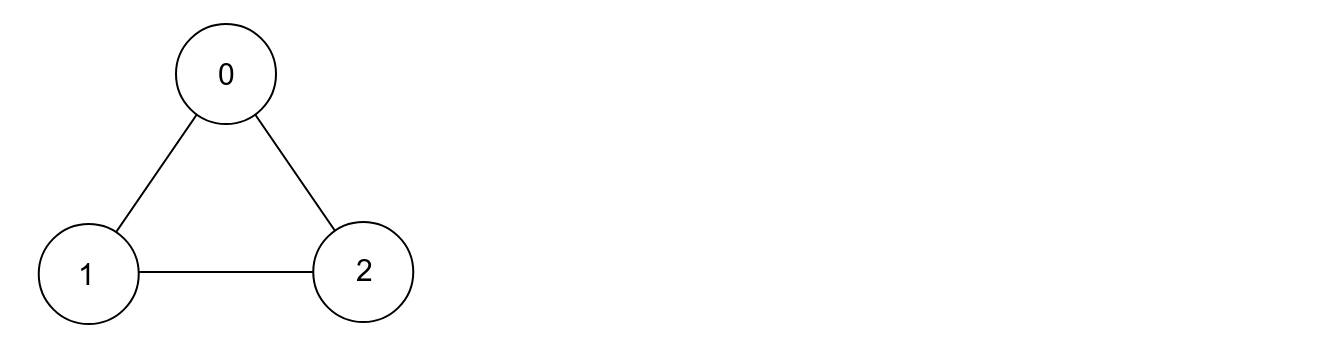

Clearly, this isn't possible, but you decide to give it a shot.  You propose the following non-local game to your enemy:
1. Your enemy picks a vertex $s$ in the graph ($0$, $1$, or $2$) uniformly at random.
2. Your enemy gives you $s$.
2. Your enemy gives your friend either $s$ or $s+1 \mod 3$, with $50\%$ probability (call this vertex $t$).
3. You and your friend return colors (red or blue).
4. If the vertex your enemy gave you and your friend were the same vertex, he checks that the colors are the same. Otherwise he checks that the colors are different.

(The enemy is the referee of this game, and you and your friend are like Alice and Bob in CHSH)

**a)** What is the best probability that any classical strategy can win this game with?

### Solution

**b)** Let's say you and your friend are resourceful and happened to share a single EPR pair before playing the non-local game with your enemy.  Fill in the following functions that take in a quantum register (initialized to an EPR pair), and a question (from 0, 1, 2), and perform a measurement that plays the game (outputting the result to the classical register).  Try to get the best winning probability you can.

Hint: use the CHSH strategy for inspiration.

In [ ]:
def alice_game_circuit(qr: QuantumRegister, cr: ClassicalRegister, question: int) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Alice will need to apply a unitary gate, and then measure her qubit
    # ========= BEGIN CODE =================

    # ========= END CODE =================
    return qc

def bob_game_circuit(qr: QuantumRegister, cr: ClassicalRegister, question: int) -> QuantumCircuit:
    qc = QuantumCircuit(qr, cr)
    # Bob will need to apply a unitary gate, and then measure his qubit
    # ========= BEGIN CODE =================

    # ========= END CODE =================
    return qc

In [ ]:
def play_game(question1: int, question2: int) -> float:
    hidden_state = QuantumRegister(2, name="epr_pair")
    answers = ClassicalRegister(2, name="answer")
    global_circuit = QuantumCircuit(hidden_state, answers)
    global_circuit = add_epr_pair(global_circuit, 0, 1)
    global_circuit = append(global_circuit, lambda qr, cr : alice_game_circuit(qr, cr, question1), [0], [0])
    global_circuit = append(global_circuit, lambda qr, cr : bob_game_circuit(qr, cr, question2), [1], [1])
    total_shots = 5024
    backend = Aer.get_backend('qasm_simulator')
    job_sim = backend.run(transpile(global_circuit, backend), shots=total_shots)
    result_sim = job_sim.result()
    measurements = result_sim.get_counts(global_circuit)
    winning_shots = 0
    if question1 == question2:
        for measurement in measurements:
            if measurement[0] == measurement[1]:
                # Win this game
                winning_shots += measurements[measurement]
    else:
        for measurement in measurements:
            if measurement[0] != measurement[1]:
                # Win this game
                winning_shots += measurements[measurement]
    return winning_shots / total_shots

winning_probability = 0.0
for i in range(3):
    winning_probability += play_game(i, i)
    winning_probability += play_game(i, (i + 1) % 3)
print("Average Winning Probability: ", winning_probability / 6)

**c)** Describe the strategy that you chose and it's expected winning probability.

### Solution


**BONUS PROBLEM** If you think you have the optimal quantum strategy for this game, give a proof that there is no better quantum strategy. You may assume Alice and Bob use 1 EPR pair as their shared state. 

Many extra points if you give a proof that considers all possible quantum strategies (any entangled state, any possible measurements), 